<a href="https://colab.research.google.com/github/gonzalezcortes/NLP_with_ClimateBert/blob/main/data_04_results_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/My Drive/Research Papers/Climate_2022/'

In [ ]:
#data = pd.read_csv(directory+'detailed_results_12_05_2022-12_46_33.csv')
data = pd.read_csv(directory+'detailed_results_12_19_2022-13_20_12.csv')

In [ ]:
data.head()

,Company,2019,2020,2021
0,3i,0.012069,0.014830,0.017931
1,abf,0.014787,0.027586,0.050626
2,abrdn,0.008398,0.010258,0.021731
3,admiral,0.013403,0.019420,0.026555
4,anglo,0.041231,0.048602,0.055487


In [ ]:
cop = data['Company'].unique()
len(cop)

100

In [ ]:
cop

array(['3i', 'abf', 'abrdn', 'admiral', 'anglo', 'antofagasta', 'ashtead',
       'astra', 'auto', 'avast', 'aveva', 'aviva', 'bae', 'barclays',
       'barratt', 'bat', 'berkeley', 'bhp', 'bl', 'bnm', 'bp', 'bt',
       'bunzl', 'burberry', 'coca', 'compass', 'crh', 'croda', 'dcc',
       'dechra', 'diageo', 'electro', 'entain', 'evraz', 'experian',
       'ferguson', 'flutter', 'fresnillo', 'glencore', 'gsk', 'halma',
       'hikma', 'hl', 'hsbc', 'imperial', 'informa', 'intercontinental',
       'intermediate', 'international', 'intertek', 'itv', 'jd',
       'kingfisher', 'land', 'lloyds', 'lng', 'lseg', 'meggitt',
       'melrose', 'mng', 'mondi', 'national', 'natwest', 'next', 'ocado',
       'pearson', 'pershing', 'persimmon', 'phoenix', 'pm', 'prud', 'rds',
       'reckitt', 'relx', 'rento', 'rm', 'rmg', 'rolls', 'rt', 'sage',
       'sb', 'sc', 'schroders', 'segro', 'sjp', 'sk', 'sm', 'smithds',
       'smiths', 'snn', 'ss', 'sse', 'st', 'tesco', 'tw', 'unilever',
       'uu',

Name, FTSE industry

In [ ]:
dict_names = {
        '3i':['3i Group plc', 'Financials'],
        'abf':['Associated British Foods plc','Consumer Staples'],
        'abrdn':['Abrdn plc','Financials'],
        'admiral':['Admiral group plc','Financials'],
        'anglo':['Anglo amercian plc','Basic Materials'],
        'antofagasta':['Antofagasta plc','Basic Materials'],
        'ashtead':['Ashtead Group plc','Industrials'],
        'astra':['AstraZeneca plc','Health Care'], 
        'auto':['Auto trader group plc','Technology'],
        'avast':['Avast plc','Technology'], 
        'aveva':['Aveva group plc','Technology'], 
        'aviva':['Aviva plc','Financials'],
        'bae':['Bae systems plc','Industrials'],
        'barclays':['Barclays plc','Financials'],
        'barratt':['Barratt Developments plc','Consumer Discretionary'],
        'bat':['British american tobacco plc','Consumer Staples'],
        'berkeley':['Berkeley group holdings (the) plc','Consumer Discretionary'],
        'bhp':['BHP Group Limited','Basic Materials'],
        'bl':['BRITISH LAND COMPANY PLC','Real Estate'],
        'bnm':['B&M EUROPEAN VALUE RETAIL S.A.','Consumer Discretionary'],
        'bp':['BP PLC','Energy'],
        'bt':['BT Group plc','Telecommunications'],
        'bunzl':['BUNZL PLC','Industrials'],
        'burberry':['BURBERRY GROUP PLC','Consumer Discretionary'],
        'coca':['Coca-Cola HBC AG','Consumer Staples'],
        'compass':['COMPASS GROUP PLC','Consumer Discretionary'],
        'crh':['CRH PLC','Industrials'],
        'croda':['Croda International Plc','Basic Materials'],
        'dcc':['DCC Plc','Industrials'],
        'dechra':['DECHRA PHARMACEUTICALS PLC','Health Care'], 
        'diageo':['DIAGEO PLC','Consumer Staples'],
        'electro':['RS Group plc','Industrials'],
        'entain':['Entain Plc','Consumer Discretionary'],
        'evraz':['EVRAZ PLC','Basic Materials'],
        'experian':['Experian plc','Industrials'],
        'ferguson':['FERGUSON PLC','Industrials'],
        'flutter':['FLUTTER ENTERTAINMENT PLC','Consumer Discretionary'],
        'fresnillo':['Fresnillo Plc','Basic Materials'],
        'glencore':['Glencore PLC','Basic Materials'],
        'gsk':['GSK PLC','Health Care'],
        'halma':['HALMA PLC','Industrials'],
        'hikma':['Hikma Pharmaceuticals Plc','Health Care'],
        'hl':['Hargreaves Lansdown Plc','Financials'],
        'hsbc':['HSBC Holdings Plc','Financials'],
        'imperial':['IMPERIAL BRANDS PLC','Consumer Staples'],
        'informa':['Informa Plc','Consumer Discretionary'],
        'intercontinental':['INTERCONTINENTAL HOTELS GROUP PLC','Consumer Discretionary'],
        'intermediate':['Intermediate Capital Group Plc','Financials'],
        'international':['INTERNATIONAL CONSOLIDATED AIRLINES GROUP S.A.','Consumer Discretionary'],
        'intertek':['INTERTEK GROUP PLC','Industrials'],
        'itv':['ITV PLC','Consumer Discretionary'],
        'jd':['JD SPORTS FASHION PLC','Consumer Discretionary'],
        'kingfisher':['Kingfisher plc','Consumer Discretionary'],
        'land':['LAND SECURITIES GROUP PLC','Real Estate'],
        'lloyds':['Lloyds Banking Group Plc','Financials'],
        'lng':['Legal & General Group PLC','Financials'],
        'lseg':['London Stock Exchange Group Plc','Financials'],
        'meggitt':['Meggitt PLC ','Industrials'],
        'melrose':['MELROSE INDUSTRIES PLC','Industrials'],
        'mng':['M&G plc','Financials'],
        'mondi':['MONDI PLC','Industrials'],
        'national':['National Grid plc','Utilities'],
        'natwest':['NatWest Group plc','Financials'],
        'next':['Next Plc','Consumer Discretionary'],
        'ocado':['Ocado Group Plc','Consumer Staples'],
        'pearson':['PEARSON PLC','Consumer Discretionary'],
        'pershing':['Pershing Square Holdings Ltd','Financials'],
        'persimmon':['PERSIMMON PLC','Consumer Discretionary'],
        'phoenix':['Phoenix Group Holdings','Financials'],
        'pm':['Polymetal International Plc','Basic Materials'],
        'prud':['Prudential Plc','Financials'],
        'rds':['Shell Plc','Energy'],
        'reckitt':['Reckitt Benckiser Group Plc','Consumer Staples'],
        'relx':['RELX PLC','Consumer Discretionary'],
        'rento':['RENTOKIL INITIAL PLC','Industrials'],
        'rm':['RIGHTMOVE PLC','Real Estate'],
        'rmg':['INTERNATIONAL DISTRIBUTIONS SERVICES PLC','Industrials'],
        'rolls':['Rolls-Royce Holdings Plc','Industrials'],
        'rt':['Rio Tinto Plc','Basic Materials'],
        'sage':['Sage Group Plc (The)','Technology'],
        'sb':['J Sainsbury PLC','Consumer Staples'], 
        'sc':['STANDARD CHARTERED PLC','Financials'],
        'schroders':['SCHRODERS PLC','Financials'],
        'segro':['Segro PLC (REIT)','Real Estate'],
        'sjp':['ST. JAMES´S PLACE PLC','Financials'],
        'sk':['SMURFIT KAPPA GROUP PLC','Industrials'],
        'sm':['SCOTTISH MORTGAGE INVESTMENT TRUST PLC','Financials'],
        'smithds':['DS Smith Plc','Industrials'],
        'smiths':['Smiths Group Plc','Industrials'],
        'snn':['SMITH & NEPHEW PLC','Health Care'],
        'ss':['SPIRAX-SARCO ENGINEERING PLC','Industrials'],
        'sse':['SSE PLC','Utilities'],
        'st':['Severn Trent Plc','Utilities'],
        'tesco':['Tesco PLC','Consumer Staples'],
        'tw':['TAYLOR WIMPEY PLC','Consumer Discretionary'],
        'unilever':['Unilever Plc','Consumer Staples'],
        'uu':['United Utilities Group Plc','Utilities'],
        'vodafone':['Vodafone Group Plc','Telecommunications'],
        'whitbread':['Whitbread Plc','Consumer Discretionary'],
        'wpp':['WPP PLC','Consumer Discretionary']}

In [ ]:
years = ['2019','2020','2021']

In [ ]:
data['change'] = ((data['2021']-data['2019'])/data['2019'])*100

In [ ]:
data['Company_name'] = data['Company'].map(lambda x: dict_names[x][0].lower())
data['FTSE industry'] = data['Company'].map(lambda x: dict_names[x][1].lower())

In [ ]:
data = data[['Company', 'Company_name', 'FTSE industry', '2019', '2020', '2021', 'change']]
data.round(4)

,Company,Company_name,FTSE industry,2019,2020,2021,change
0,3i,3i group plc,financials,0.0121,0.0148,0.0179,48.5751
1,abf,associated british foods plc,consumer staples,0.0148,0.0276,0.0506,242.3779
2,abrdn,abrdn plc,financials,0.0084,0.0103,0.0217,158.7625
3,admiral,admiral group plc,financials,0.0134,0.0194,0.0266,98.1200
4,anglo,anglo amercian plc,basic materials,0.0412,0.0486,0.0555,34.5772
...,...,...,...,...,...,...,...
95,unilever,unilever plc,consumer staples,0.0566,0.0646,0.0714,26.2472
96,uu,united utilities group plc,utilities,0.0285,0.0373,0.0477,67.5030
97,vodafone,vodafone group plc,telecommunications,0.0127,0.0140,0.0194,53.0586
98,whitbread,whitbread plc,consumer discretionary,0.0284,0.0272,0.0246,-13.2301


In [ ]:
data.drop(data[data['Company'] == 'hl'].index, inplace = True)

In [ ]:
data['change'].mean()

121.23222280810474

In [ ]:
data_b = data.copy()
data_b = data_b.drop(columns=['change'])

In [ ]:
data_grouped = data_b.groupby(['FTSE industry']).mean()
data_grouped['change'] = ((data_grouped['2021']-data_grouped['2019'])/data_grouped['2019'])

data_grouped.round(4)


,2019,2020,2021,change
FTSE industry,,,,
basic materials,0.0303,0.0410,0.0478,57.5825
consumer discretionary,0.0226,0.0252,0.0337,49.6402
consumer staples,0.0307,0.0310,0.0389,26.5383
energy,0.0307,0.0416,0.0420,36.8800
financials,0.0117,0.0173,0.0231,97.3489
health care,0.0126,0.0168,0.0233,85.2163
industrials,0.0238,0.0319,0.0448,88.5709
real estate,0.0209,0.0361,0.0391,86.6743
technology,0.0059,0.0096,0.0208,251.7806


In [ ]:
data_time_series = data.drop(columns=['change', 'Company'])

In [ ]:
data_time_series = pd.melt(data, id_vars=['Company_name','FTSE industry'], value_vars=['2019', '2020', '2021'], var_name="Year", value_name="Value")

[Text(0.5, 1.0, 'Evolution through the years')]

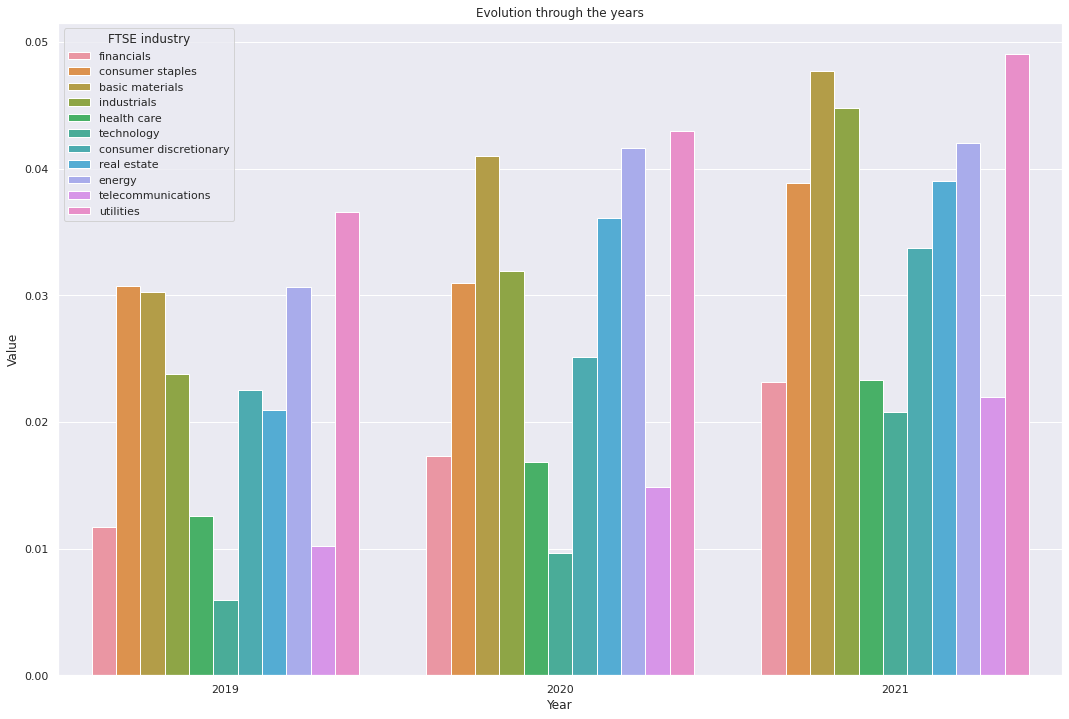

In [ ]:
f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x="Year", y="Value",
             hue="FTSE industry",
             data=data_time_series, ci=None).set(title='Evolution through the years')

[Text(0.5, 1.0, 'Evolution through the years')]

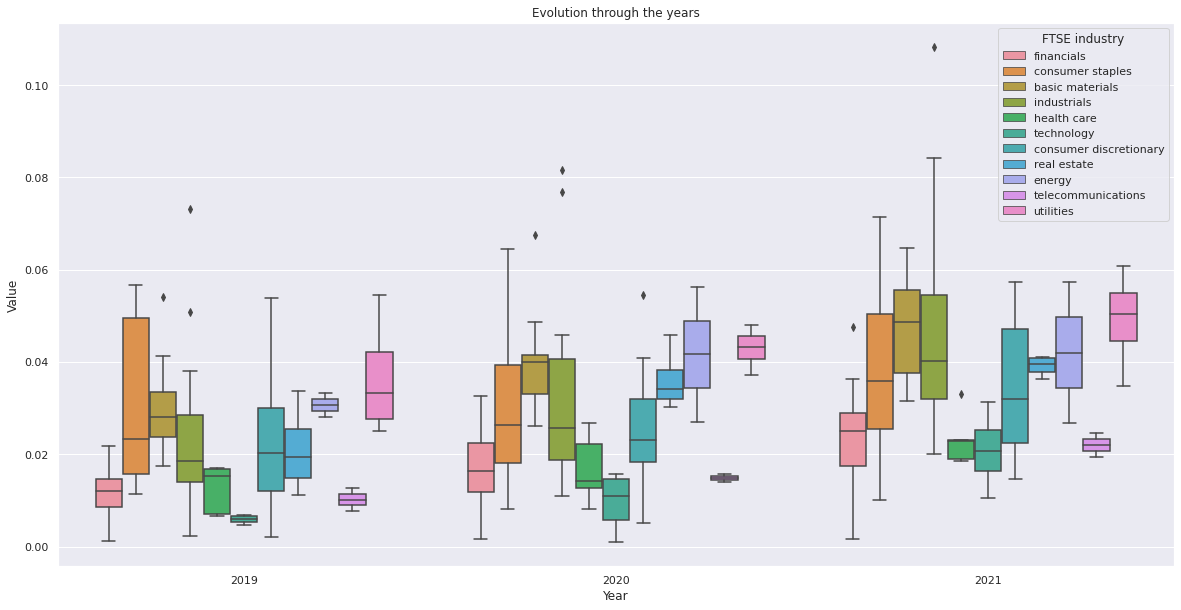

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="Year", y="Value",
             hue="FTSE industry",
             data=data_time_series).set(title='Evolution through the years')

[Text(0.5, 1.0, 'Average change between 2019 and 2021')]

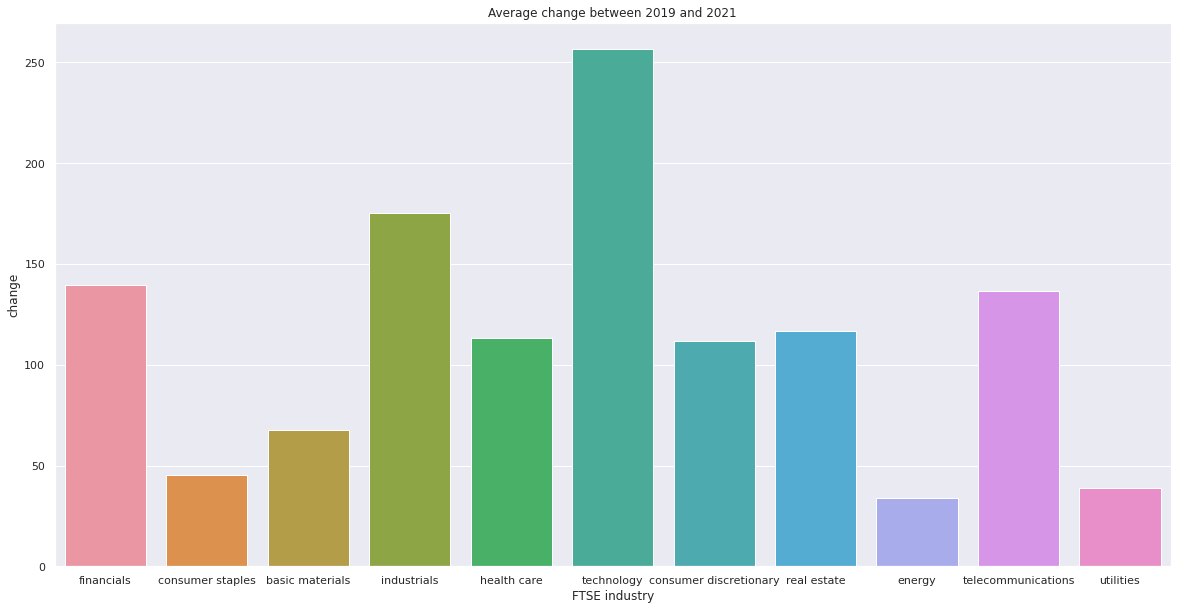

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data, x="FTSE industry", y="change",ci=None).set(title='Average change between 2019 and 2021')

In [ ]:
#path = '/content/drive/My Drive/Research Papers/Climate_2022/detailed_results_b_'
#time_string = time.strftime("%m_%d_%Y-%H_%M_%S", time.localtime())
#data.to_csv(path+time_string+'.csv')